In [1]:
#visulize the dataset "matbench_mp_gap" from matbench via matminer
from matminer.datasets import load_dataset
#load the dataset
data = load_dataset("matbench_mp_gap")
#print first 5 rows of dataframe to visualize its structure
#visualize the structure of the data
data.head()

,structure,gap pbe
0,"[[-0.00812638 0.02476014 -0.01698117] K, [-0....",1.3322
1,"[[0. 1.78463544 1.78463544] Cr, [1.784...",0.0000
2,"[[-2.13764909 -2.12540569 -2.14704542] Cs, [-6...",0.0000
3,"[[0. 0. 0.] Si, [ 4.55195829 4.55195829 -4.55...",0.4113
4,"[[0. 2.655 2.655] Ca, [2.655 0. 2.655] C...",0.3514


In [3]:
#print the list of columns of data 
data.columns

Index(['structure', 'gap pbe'], dtype='object')

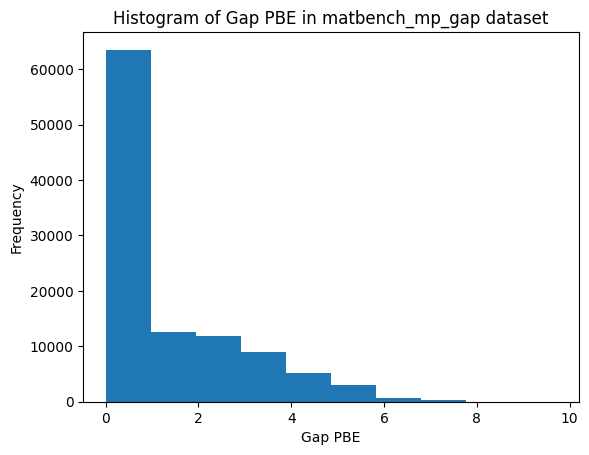

In [4]:
#plotting the histogram for 'gap pbe' column
import matplotlib.pyplot as plt
plt.hist(data['gap pbe'], bins=10)
plt.xlabel('Gap PBE')
plt.ylabel('Frequency')
plt.title('Histogram of Gap PBE in matbench_mp_gap dataset')
plt.show()

In [10]:
# Instantiating multple featurizer and featurize the data
# Randomly sampling 1% samples from the dataset due to its large size
# List of featurizers are provided Bing AI
import pandas as pd
from tqdm import tqdm
from matminer.featurizers.structure import (
    ChemicalOrdering,
    DensityFeatures,
    Dimensionality,
    GlobalSymmetryFeatures,
    JarvisCFID,
    MaximumPackingEfficiency,
    SiteStatsFingerprint,
    StructuralComplexity,
    StructuralHeterogeneity
)
from matminer.featurizers.base import MultipleFeaturizer
from pymatgen.core import Structure
# Combine all the featurizers into a MultipleFeaturizer
featurizer = MultipleFeaturizer([
    ChemicalOrdering(),
    DensityFeatures(),
    Dimensionality(),
    GlobalSymmetryFeatures(),
    # JarvisCFID(),
    MaximumPackingEfficiency(),
    # SiteStatsFingerprint.from_preset("CrystalNNFingerprint_ops"),  # Example preset
    StructuralComplexity(),
    StructuralHeterogeneity()
])

# Randomly sampling 0.1% samples (row) from data dataframe
sample_data = data.sample(frac=1e-3, random_state=312)



# Featurize the structure
# Drop sample that contains NaN in the featurized value or sample that is too large

def try_input(func, x:Structure):
    if len(x.cart_coords)>50:
        return None
    try: 
        return func(x)
    except: 
        return None


features = [try_input(featurizer.featurize, i) for i in tqdm(sample_data['structure'])]
# Remove missing values from features list
features = [f for f in features if f is not None]

# df = pd.DataFrame(features,columns=['ChemicalOrdering','DensityFeatures',
#  'Dimensionality','GlobalSymmetryFeatures',
#  'JarvisCFID','MaximumPackingEfficiency',
#  'SiteStatsFingerprint','StructuralComplexity',
#  'StructuralHeterogeneity'
# ])


  0%|          | 0/106 [00:00<?, ?it/s]d:\mse\.venv\Lib\site-packages\pymatgen\analysis\local_env.py:4158: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn(
d:\mse\.venv\Lib\site-packages\pymatgen\analysis\local_env.py:3951: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  warnings.warn(
100%|██████████| 106/106 [01:14<00:00,  1.42it/s]


In [11]:
lens = [len(i) for i in features]

In [9]:

# Define the featurizers
featurizers = [
    ChemicalOrdering(),
    DensityFeatures(),
    Dimensionality(),
    GlobalSymmetryFeatures(),
    MaximumPackingEfficiency(),
    StructuralComplexity(),
    StructuralHeterogeneity()
]

# Featurize the input 'x' and collect results in a list
features_list = []
for featurizer in featurizers:
    features = featurizer.featurize(data['structure'][0])
    features_list.append(features)

# Print the result
print(features_list)


d:\mse\.venv\Lib\site-packages\pymatgen\analysis\local_env.py:4158: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn(
d:\mse\.venv\Lib\site-packages\pymatgen\analysis\local_env.py:3951: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  warnings.warn(


[[0.7836410597029336, 0.5435888540503624, 0.39397838004412283], [3.781313307099553, 13.836877893994732, 1.046222931115452], [3], [119, 'tetragonal', 4, False, 8], [0.3880733265392723], (2.0, 32.0), [0.06082437426330586, 1.1216933010430052, 0.9038995276501245, 0.08921731745819841, 0.1353547871920996, 0.046137469733901176, 0.11287686695392088, 0.013465773383511598, 0.12211629611326867]]
